# Let's get started with EDA

Let's us begin by importing the necessary packages to perform Exploratory Data Analysis

In [25]:
import pandas as pd 
import seaborn as sns
import numpy as np


Matplotlib is building the font cache; this may take a moment.


Step 1: Import Data

In [3]:
data = pd.read_csv("data/IT Salary Survey EU  2020.csv")

In [4]:
data.head(10)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",...,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
6,24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,...,NaN,27,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,600
8,24/11/2020 11:17:24,29.0,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,NaN
9,24/11/2020 11:17:50,35.0,Male,Berlin,Software Engineer,15,3,Lead,Java,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [7]:
data.shape

(1253, 23)

The next step would be to clean the data by removing unnecessary fields.

We can rename the table columns first.


In [10]:
data.columns = ["Year", "Age", "Gender","City","Position","Years of experience","Experience in Germany","Seniority level","Main Programming language",
                       "Other Language","Yearly salary","Yearly bonus and stocks", "Salary one year ago","Bonus and stocks last year","Vacation days",
                       "Employment_status","Сontract_duration","Language","Company size","Company type","Job loss COVID","Kurzarbeit","Monetary Support"]
                    


data.columns = data.columns.str.replace(' ', '_')

In [12]:
data.columns

Index(['Year', 'Age', 'Gender', 'City', 'Position', 'Years_of_experience',
       'Experience_in_Germany', 'Seniority_level', 'Main_Programming_language',
       'Other_Language', 'Yearly_salary', 'Yearly_bonus_and_stocks',
       'Salary_one_year_ago', 'Bonus_and_stocks_last_year', 'Vacation_days',
       'Employment_status', 'Сontract_duration', 'Language', 'Company_size',
       'Company_type', 'Job_loss_COVID', 'Kurzarbeit', 'Monetary_Support'],
      dtype='object')

Delete the unneeded columns

In [19]:
del data['Experience_in_Germany']
del data['Other_Language']
del data['Employment_status']
del data['Сontract_duration']
del data['Vacation_days']

KeyError: 'Experience_in_Germany'

In [15]:
data.shape

(1253, 19)

Getting the number of null values in the table

In [16]:
data.isna().sum()

Year                            0
Age                            27
Gender                         10
City                            0
Position                        6
Years_of_experience            16
Seniority_level                12
Main_Programming_language     127
Yearly_salary                   0
Yearly_bonus_and_stocks       424
Salary_one_year_ago           368
Bonus_and_stocks_last_year    639
Vacation_days                  68
Language                       16
Company_size                   18
Company_type                   25
Job_loss_COVID                 20
Kurzarbeit                    880
Monetary_Support              791
dtype: int64

Dropping sum of the null values

In [17]:
data = data.dropna(subset =
    ['Age','Gender','Position','Years_of_experience','Seniority_level','Salary_one_year_ago','Language']) 

data = data.drop_duplicates()

In [18]:
data.isna().sum()

Year                            0
Age                             0
Gender                          0
City                            0
Position                        0
Years_of_experience             0
Seniority_level                 0
Main_Programming_language      70
Yearly_salary                   0
Yearly_bonus_and_stocks       235
Salary_one_year_ago             0
Bonus_and_stocks_last_year    276
Vacation_days                  12
Language                        0
Company_size                    0
Company_type                    2
Job_loss_COVID                  2
Kurzarbeit                    575
Monetary_Support              511
dtype: int64

We can get to know the number of unique positions and programming languages

In [21]:
data['Main_Programming_language'].unique()

array(['TypeScript', 'Ruby', 'Javascript / Typescript', 'C# .NET',
       'AWS, GCP, Python,K8s', 'Typescript', 'PHP', 'Java',
       'Aws Hadoop Postgre Typescript', nan, 'Kotlin', 'kotlin', 'NodeJS',
       'iOS', 'Kubernetes', 'Charles', 'Go', 'Python', 'Figma',
       'JavaScript', 'Go/Python', 'React', 'С#', 'Php', 'ruby on rails',
       'JavaScript/ES6', '.NET', 'Javascript', 'C#', 'Js', 'android',
       'java', 'JavaScript ', 'Scala', 'python', 'SQL', 'VHDL',
       'Power BI', 'PHP ', 'none', 'Android', 'Swift', 'ML', 'php', 'C++',
       'Scala, React.js', 'Ruby on Rails', 'Azure, SAP',
       'Java, JavaScript', 'Python ', '-', 'Agile',
       'TypeScript, JavaScript', 'Pegasystems platform ',
       'C++, Java, Embedded C', 'Cloud', 'DC Management', 'SWIFT', '.net',
       'R', 'Bash', 'Network', 'nothing', 'Qlik BI Tool, SQL',
       'Blockchain', 'Angular', 'Autonomous Driving', 'c#',
       'Js, TypeScript, Angular', 'c++', 'Java, terraform',
       'Pascal, VB.NET, C#'

In [22]:
data['Position'].unique()

array(['Software Engineer', 'Backend Developer', 'DevOps',
       'Frontend Developer', 'Data Engineer', 'Designer (UI/UX)',
       'Product Manager', 'Mobile Developer', 'Software Architect',
       'Team Lead', 'Test manager', 'Data Scientist', 'QA Engineer',
       'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Hardware Engineer', 'Reporting Engineer',
       'agile master ', 'ML Engineer', 'Solution Architect',
       'Cloud Architect', 'Project Manager', 'Network Engineer ',
       'Agile Coach', 'Scrum Master', 'Solutions Architect',
       'Data Center Manager', 'Fullstack Developer',
       'C/C++/Java developer', 'Network Administrator',
       'Security Manager', 'BI IT Consultant', 'Graphic Designer',
       'iOS Developer', 'Cloud Engineer', 'Solutions architect',
       'Stuttgart', 'Senior Program Manager', 'Security Engineer',
       'Business Analyst', 'Support Engineer', 'Consultant', 'Recruiter',
       'Systemadministrator', 'SW Archite

PLoting the uniue values

c:\Users\kamem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

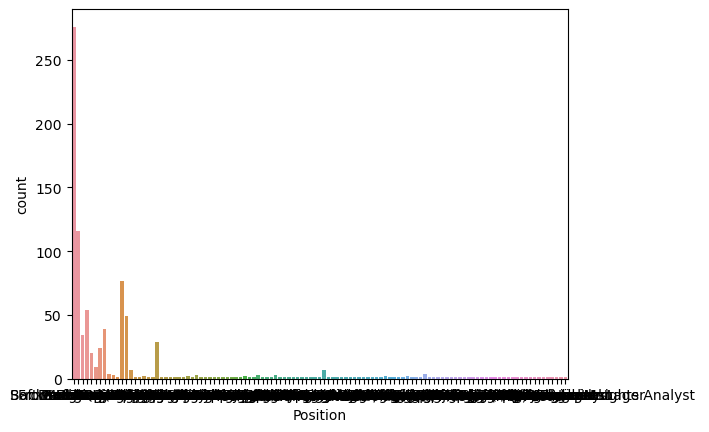

In [26]:
sns.countplot(data['Position']).unique()